# Solution to excercise sheet 1, exercise 3
Solved by Jakub Dokulil

## Theory

We have abservables
$$ \underbrace{A_1, A_2, ... A_n}_{A_1^{(n)}}, A_{n+1}, ... A_{2n}, ... $$
The correlation of subsamples - blocks is 
$$ Var(A^{(n)}) = \frac{1}{n} Var(A) $$
However if tha sample is correlated additional parameter $s$ is needed
$$ Var(A^{(n)}) = \frac{1}{n/s} Var(A) $$
Parameter $s$ we can obtain from the equation
$$ s = \lim_{n \to \infty} n \frac{Var(A^{(n)})}{Var(A)} $$

## Demonstration of the second equation

The equation will be demonstrated on sets generated by random numbers generator.

> Lets have APD monitoring photon counts with poissonian noise.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import constants

plt.style.use('scandic')

Duplicate key in file PosixPath('/Users/jakub.dokulil/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/scandic.mplstyle'), line 28 ('xtick.major.size:    0       # major tick size in points')
Duplicate key in file PosixPath('/Users/jakub.dokulil/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/scandic.mplstyle'), line 31 ('ytick.major.size:    0       # major tick size in points')


In [2]:
def subsample_data(data, n):
    resample_shape = (sample_size//n, n)
    # print(resample_shape)
    resample_no_of_samples = np.product(resample_shape)
    subsample = data[:resample_no_of_samples]
    # print(subsample.shape)
    subsample = subsample.reshape(resample_shape)
    # print(subsample.shape)
    subsample = subsample.mean(axis=1)
    return subsample

(0.0, 1048.95)

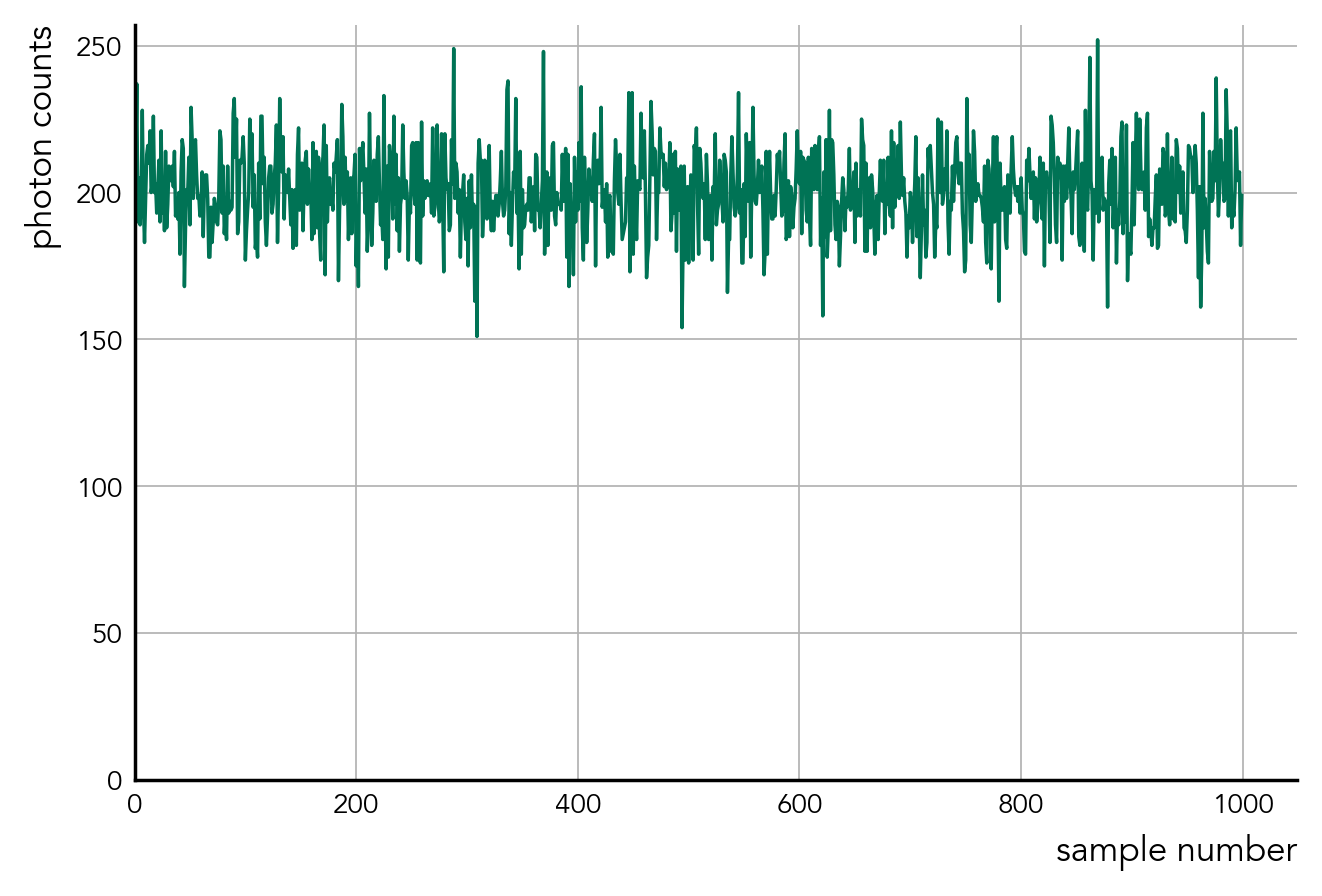

In [3]:
mu = 0
sigma = 1
sample_size = 1000

signal_strength = 200

# sample = np.random.default_rng().normal(mu, sigma, sample_size)
sample = np.ones(sample_size)*signal_strength
# add poisson noise
sample = np.random.default_rng().poisson(sample)

# plot the sample
plt.plot(sample)
plt.xlabel('sample number')
plt.ylabel('photon counts')
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)

In [4]:
n_min = 10
n_max = 100
step = 5
n = np.arange(n_min, n_max, step).astype(int) # subsample sizes

# create list of subsamples
subsamples = []

for i in n:
    resample_shape = (sample_size//i, i)
    # print(resample_shape)
    resample_no_of_samples = np.product(resample_shape)
    subsample = sample[:resample_no_of_samples]
    # print(subsample.shape)
    subsample = subsample.reshape(resample_shape)
    # print(subsample.shape)
    subsample = subsample.mean(axis=1)
    # print(subsample.shape)
    subsamples.append(subsample)


(0.0, 51.45)

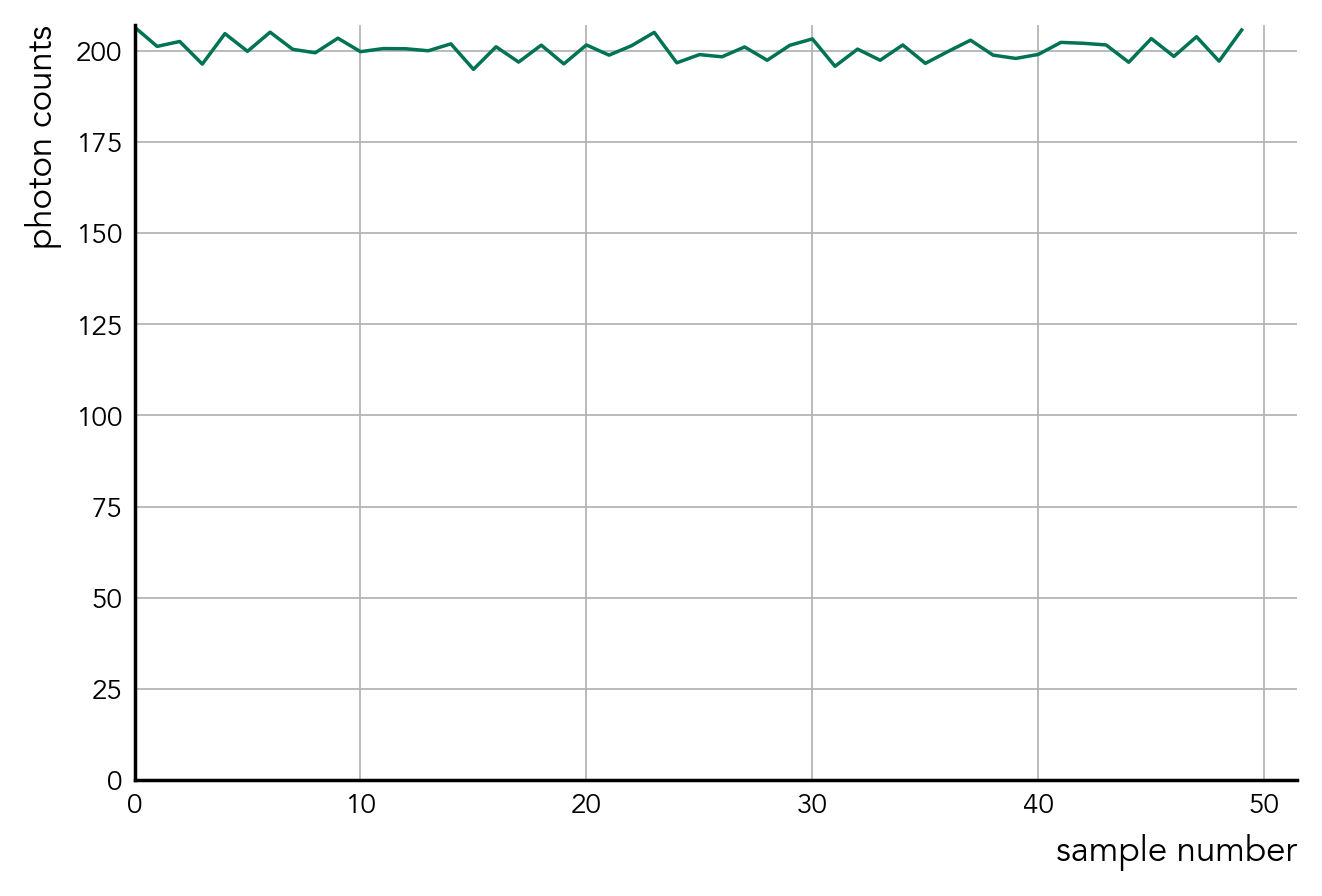

In [5]:
# visualize one subsample

subspl_to_visualise = 2

# plot the sample
plt.plot(subsamples[subspl_to_visualise])
plt.xlabel('sample number')
plt.ylabel('photon counts')
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)



sample mean:  200.374
sample variance:  194.48812399999997


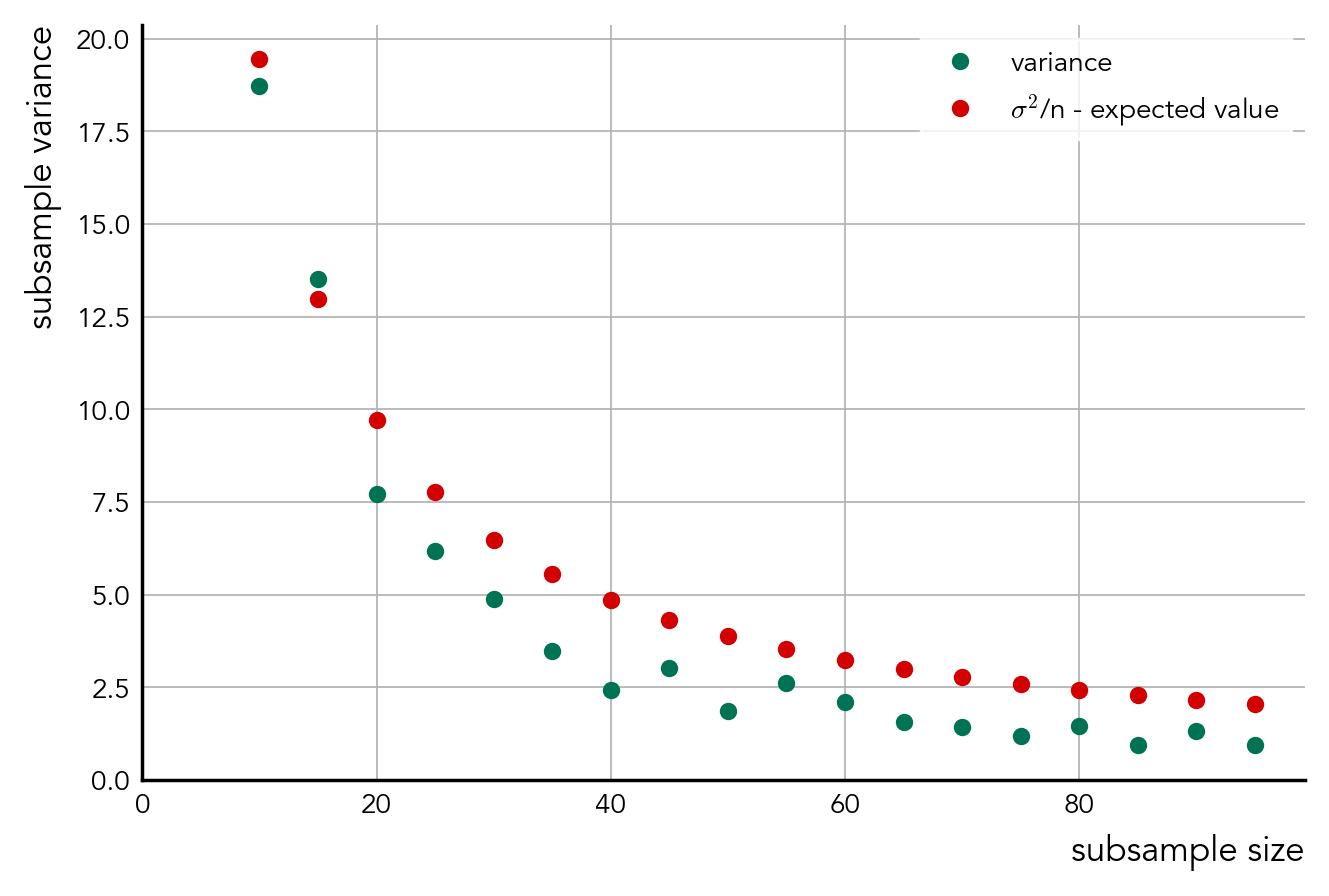

In [6]:
print('sample mean: ', sample.mean())
print('sample variance: ', sample.var())

# calculate the mean and variance of the subsamples
subsample_means = []
subsample_vars = []

for subsample in subsamples:
    subsample_means.append(subsample.mean())
    subsample_vars.append(subsample.var())

# plot the mean and variance of the subsamples
plt.plot(n, subsample_vars, 'o', label='variance')
plt.plot(n, sample.var()/n, 'o', label='$\sigma^2$/n - expected value')

# plt.plot(n, n*subsample_vars, '.', label='n $\cdot$ variance')
plt.xlabel('subsample size')
plt.ylabel('subsample variance')
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)
plt.legend()


### Question for the excercise

_Why is it lower?_

## Implement procedure for err bar calculation


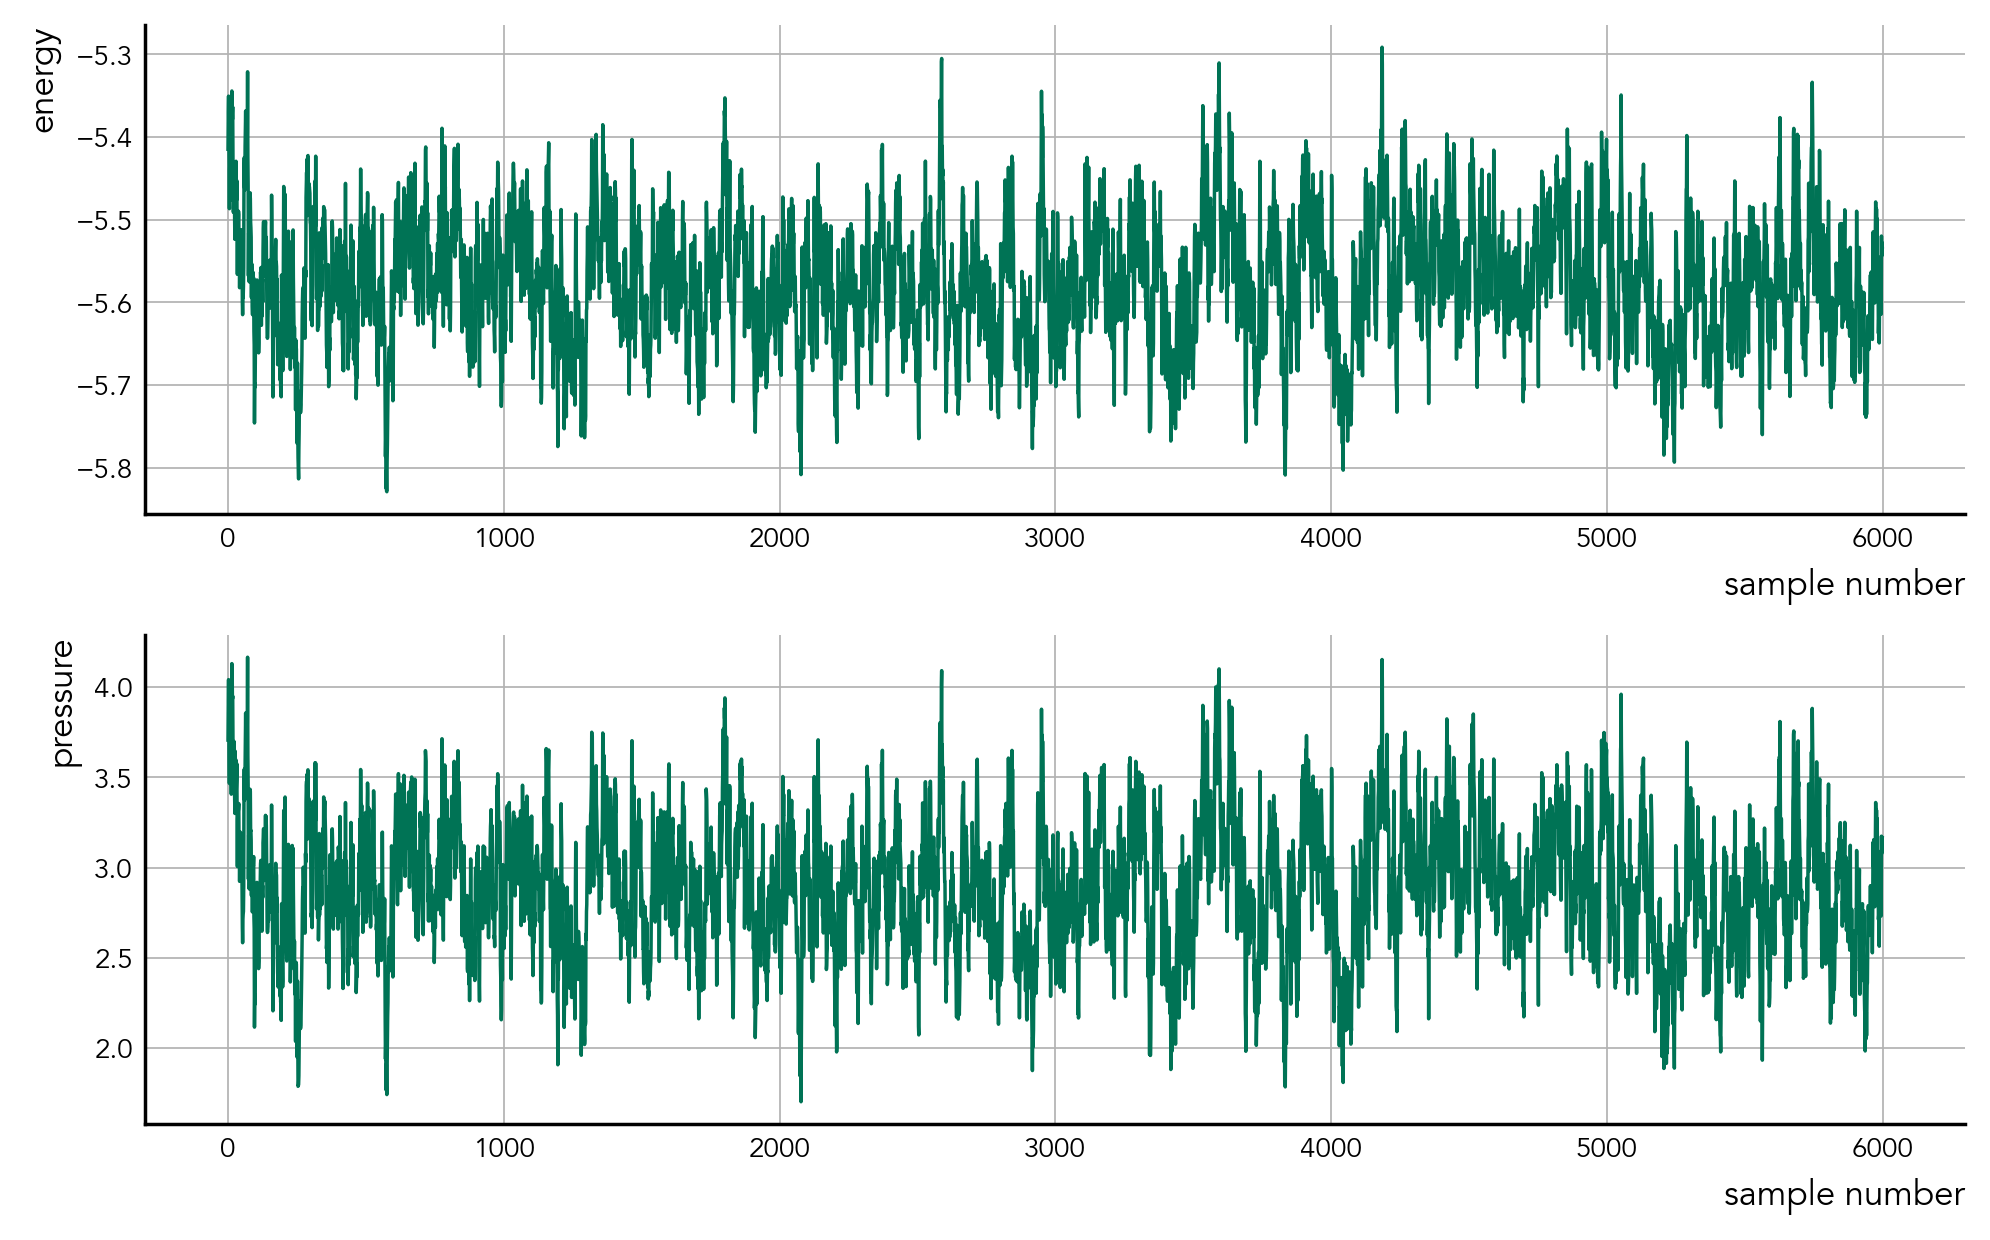

In [7]:
df = pd.read_csv("results/sim_03_run_2.dat", header=None, sep="\s+", index_col=0)

energy = df[2].to_numpy()   
pressure = df[3].to_numpy() 

fig, axs = plt.subplots(2, 1, figsize=(8, 5))

axs[0].plot(energy)
axs[0].set_xlabel('sample number')
axs[0].set_ylabel('energy')

axs[1].plot(pressure)
axs[1].set_xlabel('sample number')
axs[1].set_ylabel('pressure')

fig.tight_layout()


/Users/jakub.dokulil/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakub.dokulil/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/jakub.dokulil/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


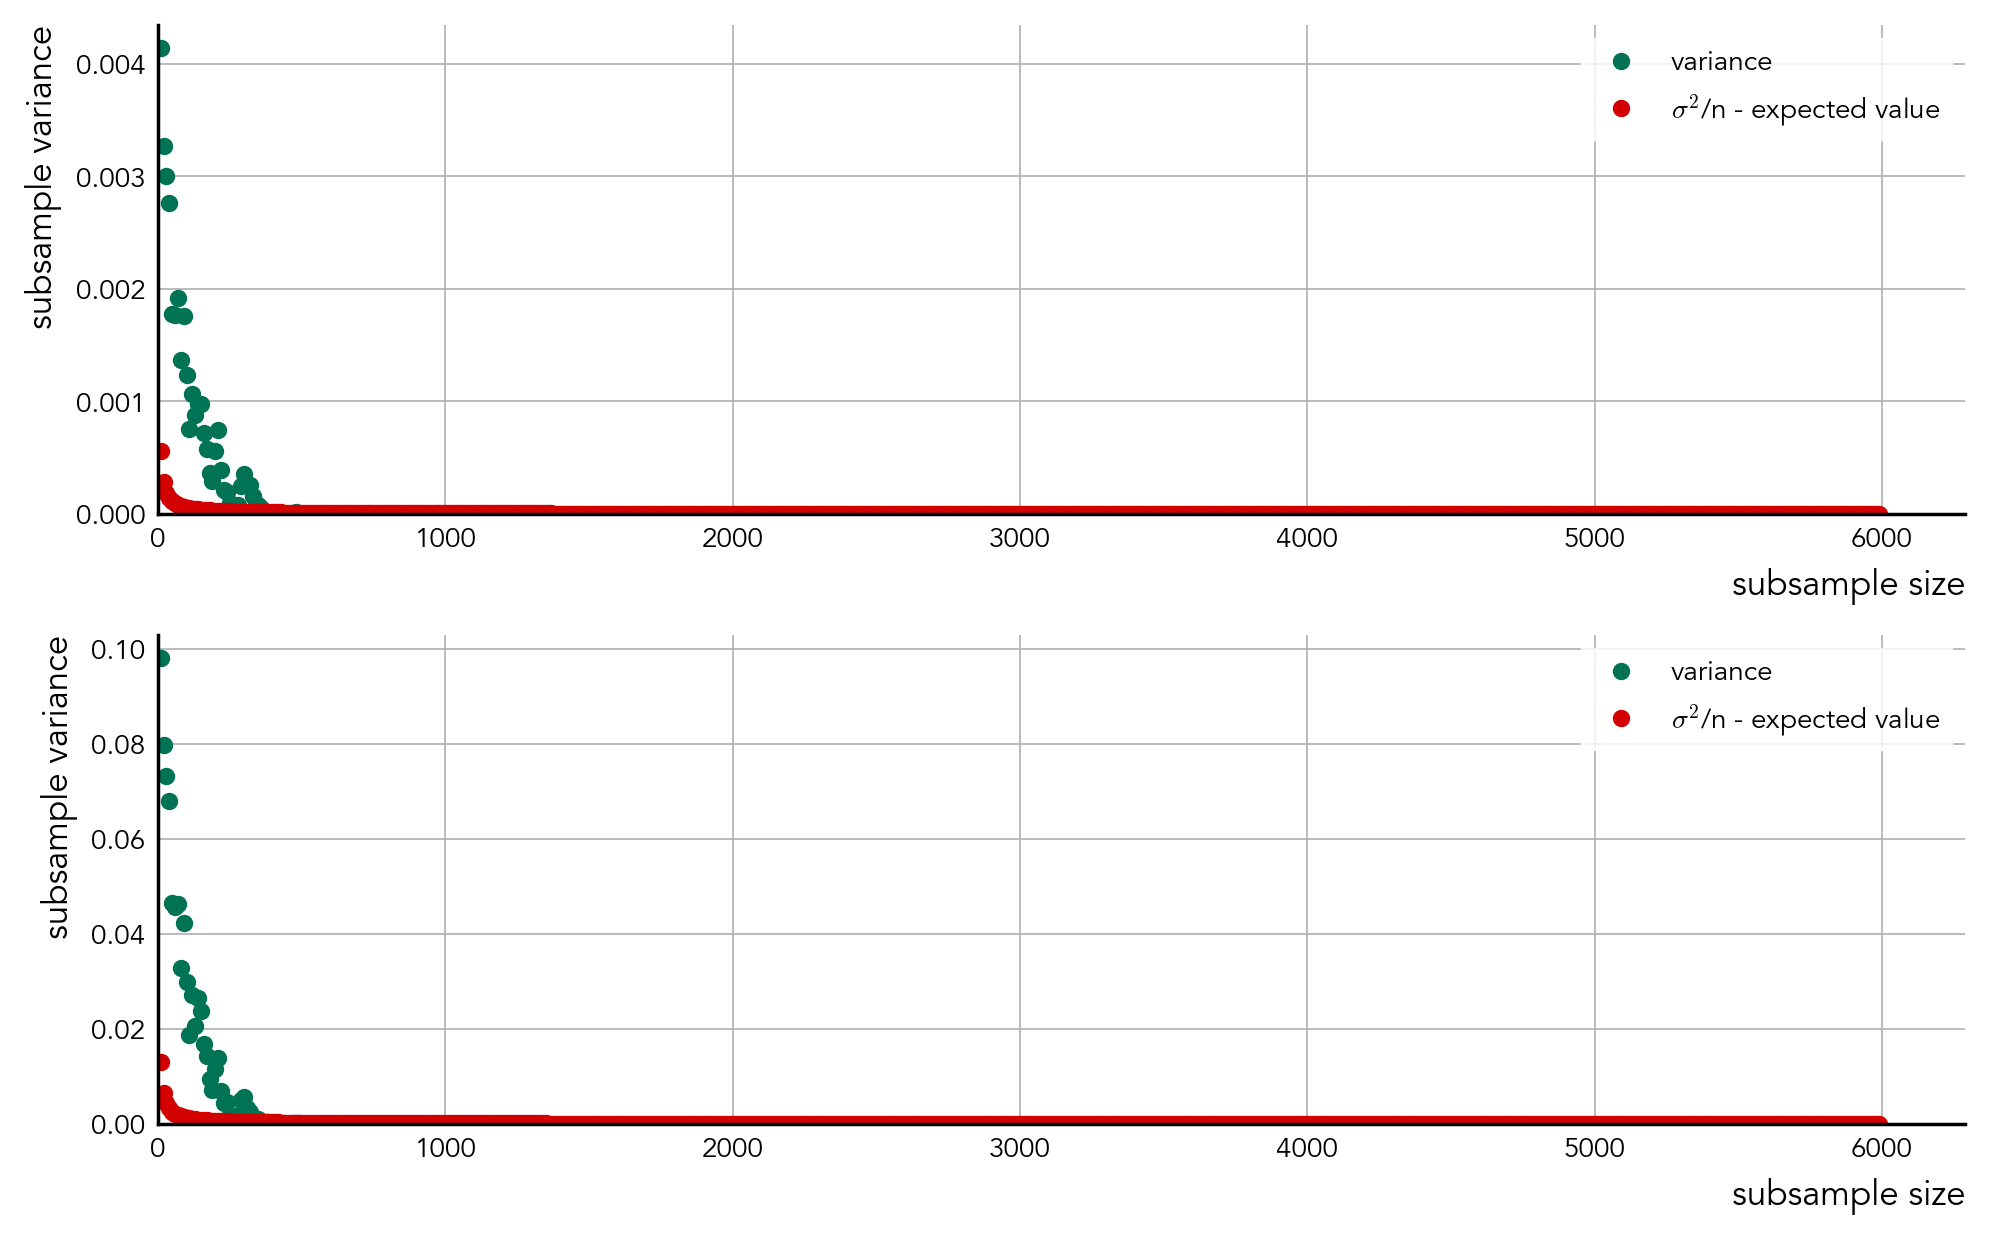

In [8]:
n_min = 10
n_max = 6000
step = 10

n = list(np.arange(n_min, n_max, step).astype(int)) # subsample sizes

energy_subsamples = [subsample_data(energy, i) for i in n]
pressure_subsamples = [subsample_data(pressure, i) for i in n]

energy_variances = np.array([np.var(i) for i in energy_subsamples])
pressure_variances = np.array([np.var(i) for i in pressure_subsamples])

# plot the mean and variance of the subsamples
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

axs[0].plot(n, energy_variances, 'o', label='variance')
axs[0].plot(n, np.var(energy)/np.array(n), 'o', label='$\sigma^2$/n - expected value')

axs[0].set_xlabel('subsample size')
axs[0].set_ylabel('subsample variance')
axs[0].set_ylim(bottom=0)
axs[0].set_xlim(left=0)
axs[0].legend()

axs[1].plot(n, pressure_variances, 'o', label='variance')
axs[1].plot(n, np.var(pressure)/np.array(n), 'o', label='$\sigma^2$/n - expected value')

axs[1].set_xlabel('subsample size')
axs[1].set_ylabel('subsample variance')
axs[1].set_ylim(bottom=0)
axs[1].set_xlim(left=0)
axs[1].legend()

fig.tight_layout()


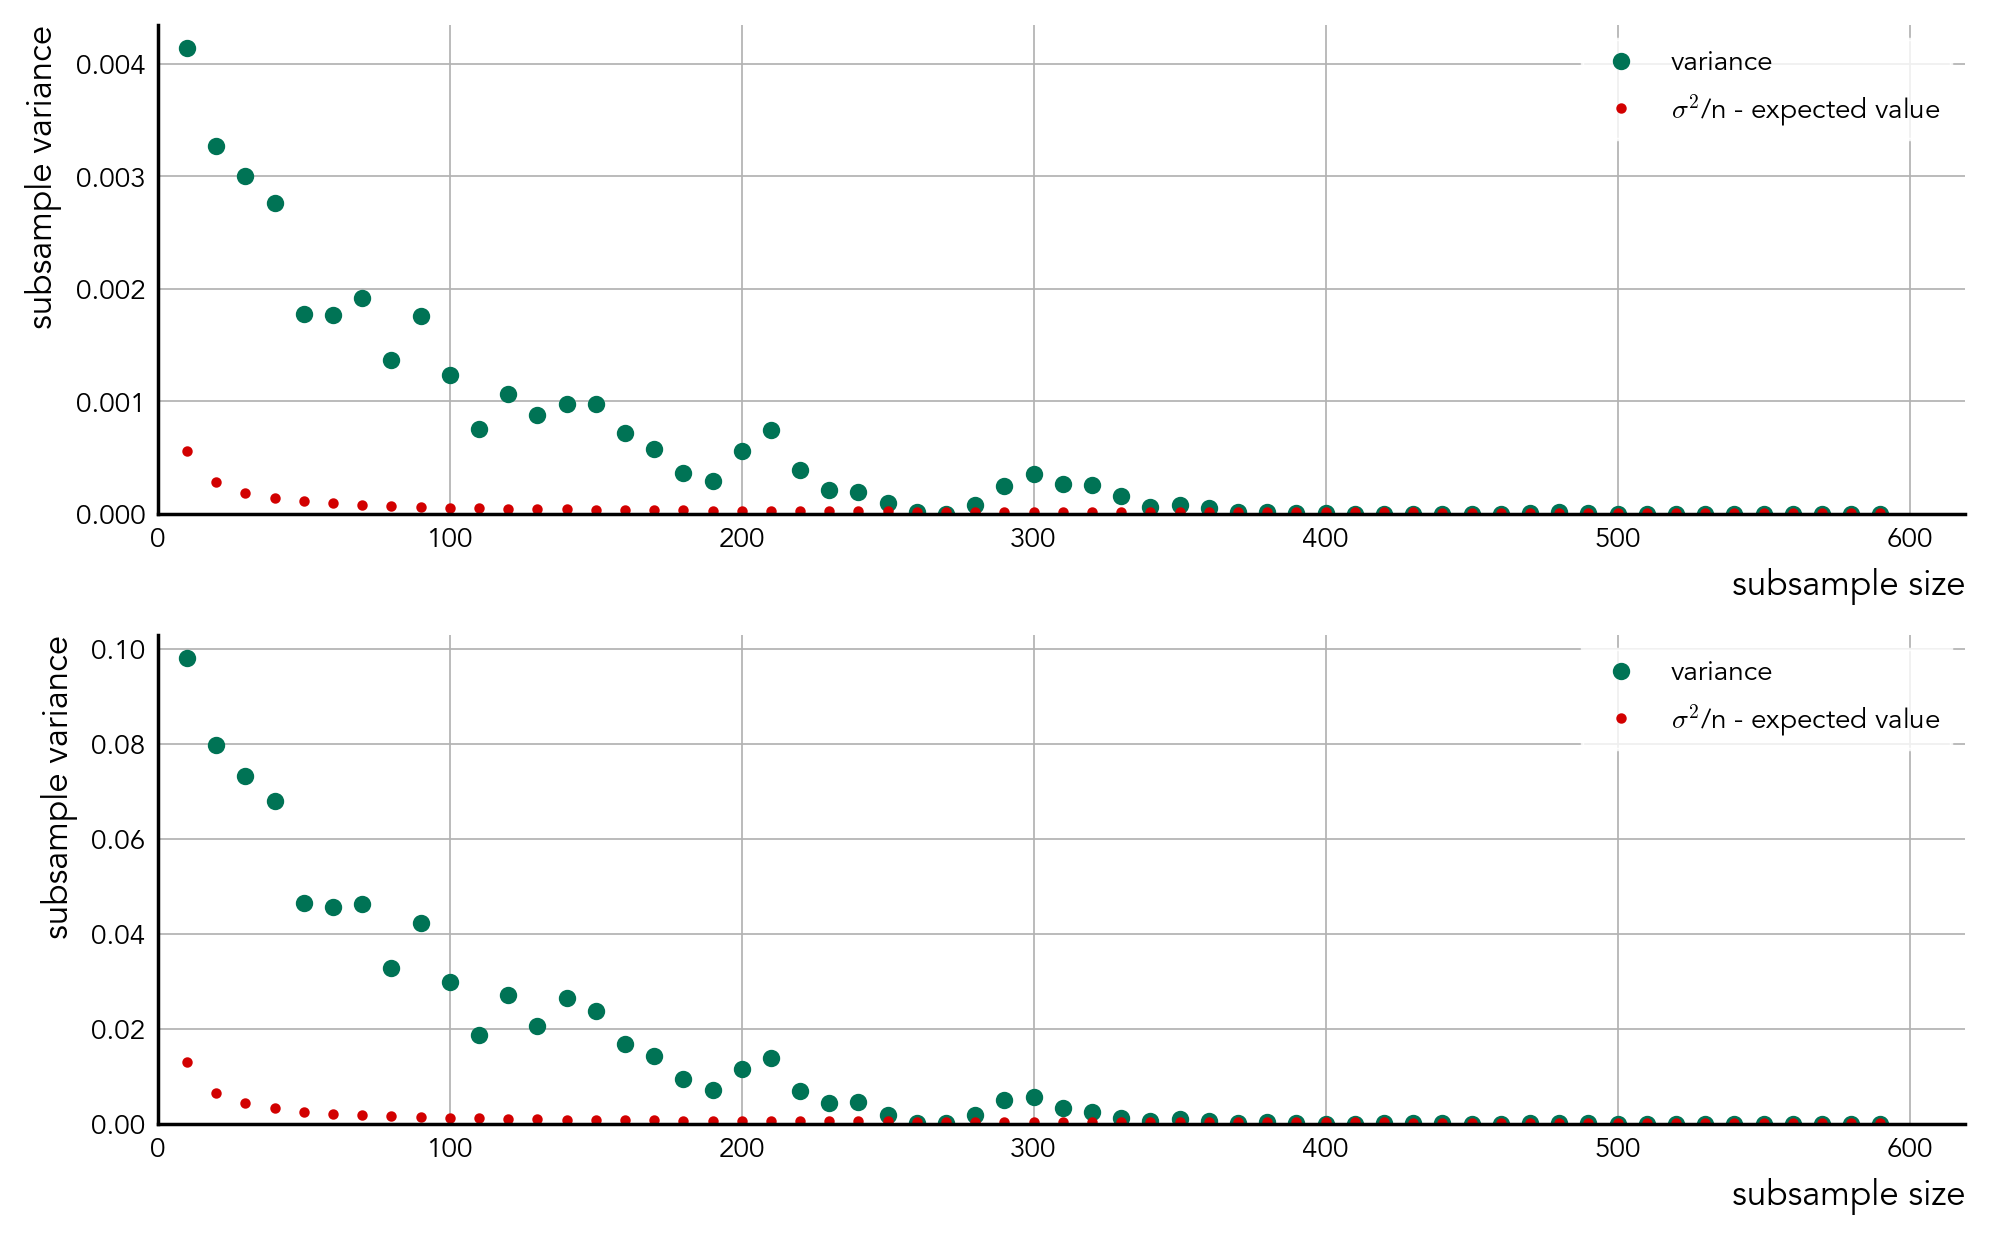

In [9]:
n_min = 10
n_max = 600
step = 10

n = list(np.arange(n_min, n_max, step).astype(int)) # subsample sizes

energy_subsamples = [subsample_data(energy, i) for i in n]
pressure_subsamples = [subsample_data(pressure, i) for i in n]

energy_variances = np.array([np.var(i) for i in energy_subsamples])
pressure_variances = np.array([np.var(i) for i in pressure_subsamples])

# plot the mean and variance of the subsamples
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

axs[0].plot(n, [np.var(i) for i in energy_subsamples], 'o', label='variance')
axs[0].plot(n, np.var(energy)/np.array(n), '.', label='$\sigma^2$/n - expected value')

axs[0].set_xlabel('subsample size')
axs[0].set_ylabel('subsample variance')
axs[0].set_ylim(bottom=0)
axs[0].set_xlim(left=0)
axs[0].legend()

axs[1].plot(n, [np.var(i) for i in pressure_subsamples], 'o', label='variance')
axs[1].plot(n, np.var(pressure)/np.array(n), '.', label='$\sigma^2$/n - expected value')

axs[1].set_xlabel('subsample size')
axs[1].set_ylabel('subsample variance')
axs[1].set_ylim(bottom=0)
axs[1].set_xlim(left=0)
axs[1].legend()

fig.tight_layout()


/Users/jakub.dokulil/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakub.dokulil/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/jakub.dokulil/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


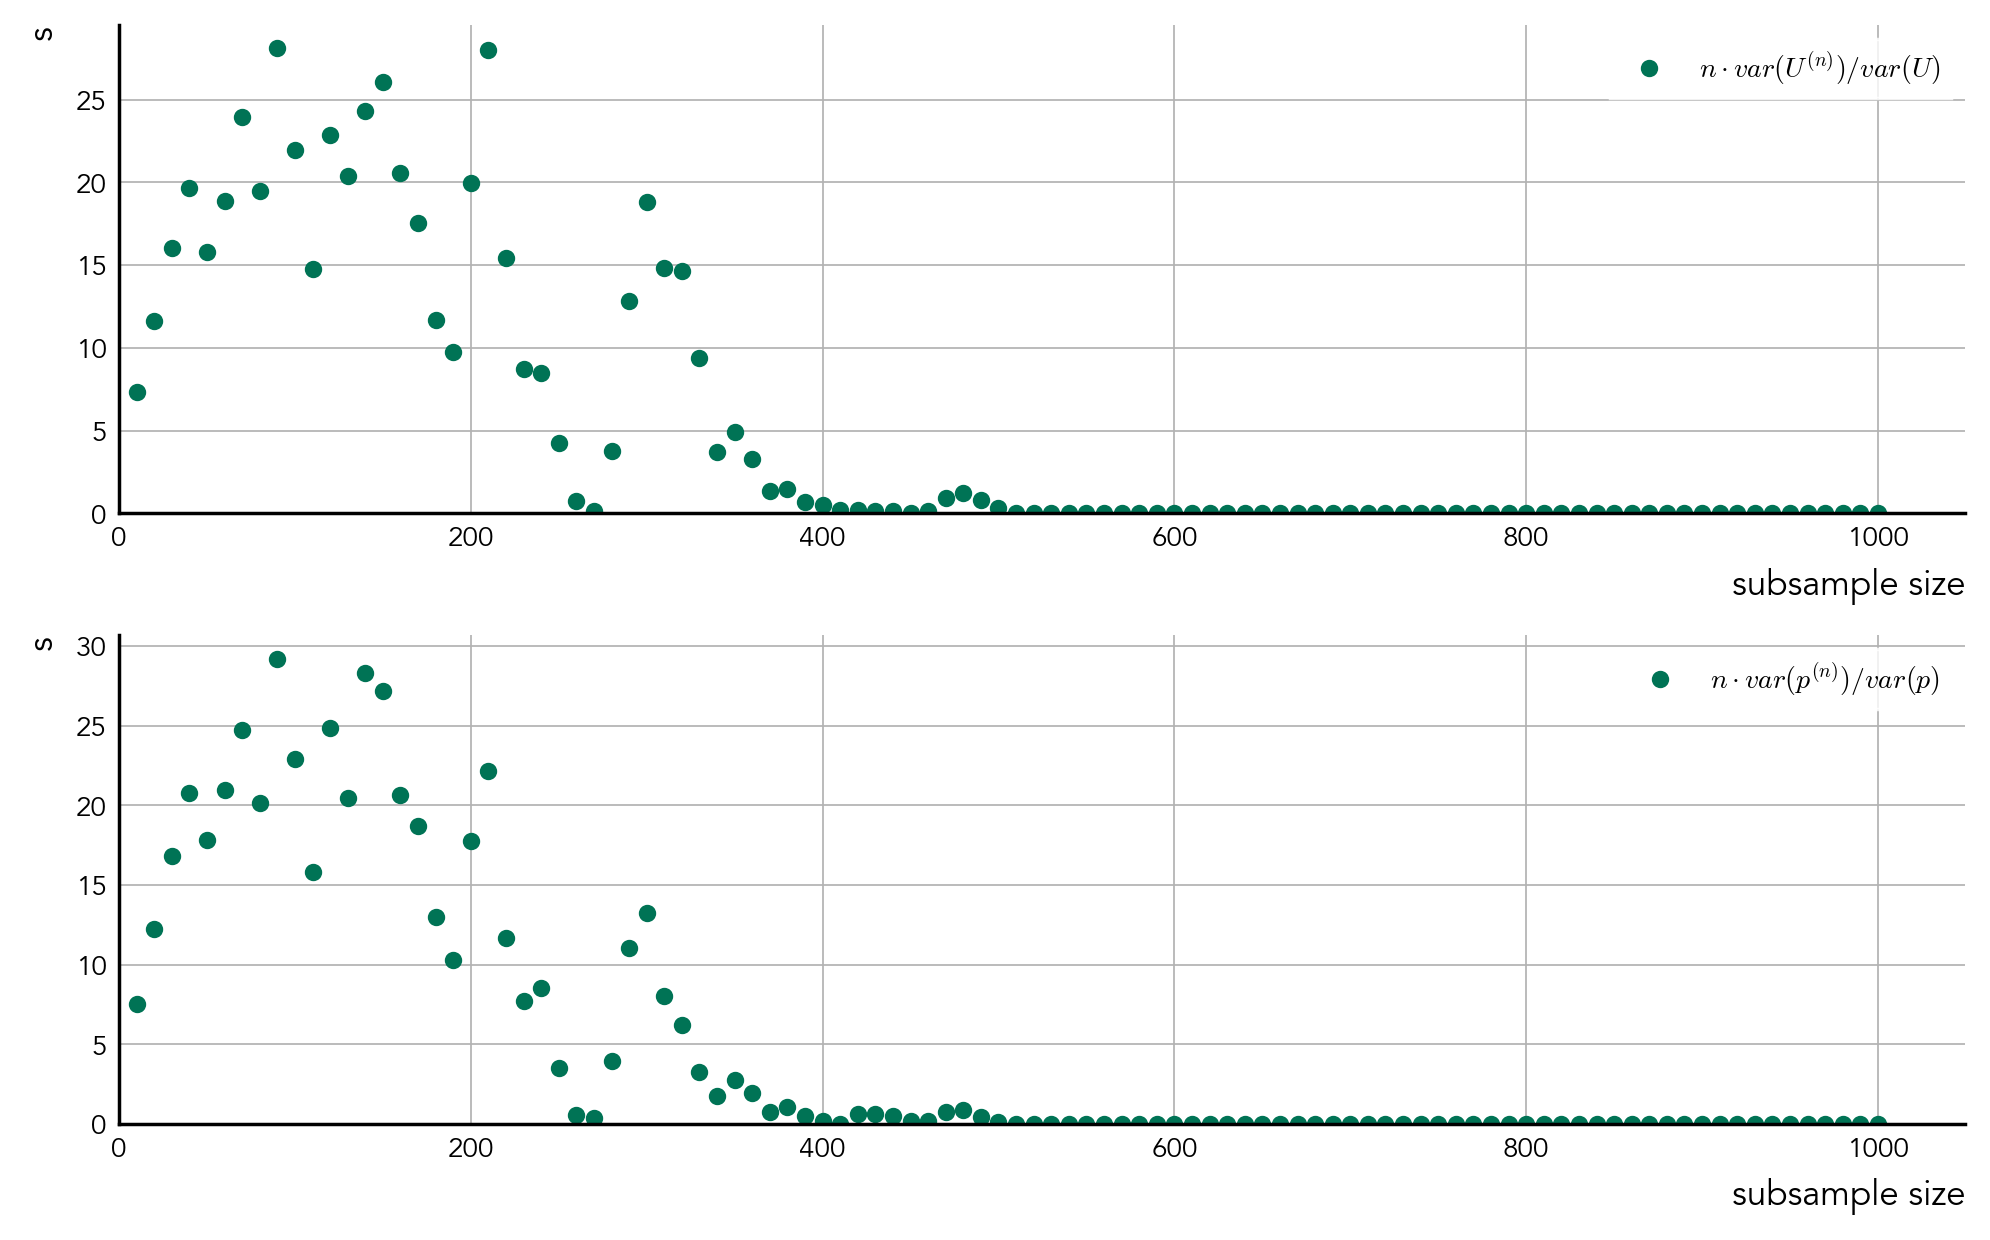

In [10]:
n_min = 10
n_max = 6000
step = 10

n = list(np.arange(n_min, n_max, step).astype(int)) # subsample sizes

energy_subsamples = [subsample_data(energy, i) for i in n]
pressure_subsamples = [subsample_data(pressure, i) for i in n]

energy_variances = np.array([np.var(i) for i in energy_subsamples])
pressure_variances = np.array([np.var(i) for i in pressure_subsamples])


s_energy = n*energy_variances/energy.var()
s_pressure = n*pressure_variances/pressure.var()

# plot the s vs n

fig, axs = plt.subplots(2, 1, figsize=(8, 5))

axs[0].plot(n, s_energy, 'o', label='$n \cdot var(U^{(n)})/ var(U)$')
# axs[0].plot(n, n, label='s = 1')
axs[0].set_xlabel('subsample size')
axs[0].set_ylabel('s')
axs[0].set_ylim(bottom=0)
axs[0].set_xlim(left=0)
axs[0].legend()

axs[1].plot(n, s_pressure, 'o', label='$n \cdot var(p^{(n)})/ var(p)$')
# axs[1].plot(n, n, label='s = 1')
axs[1].set_xlabel('subsample size')
axs[1].set_ylabel('s')
axs[1].set_ylim(bottom=0)
axs[1].set_xlim(left=0)
axs[1].legend()

fig.tight_layout()


The variance decreases with n. Therefore for 'larger' n we are effectivelly dividing 
$$ \frac{\text{small number}}{\text{large number}} \to 0 $$

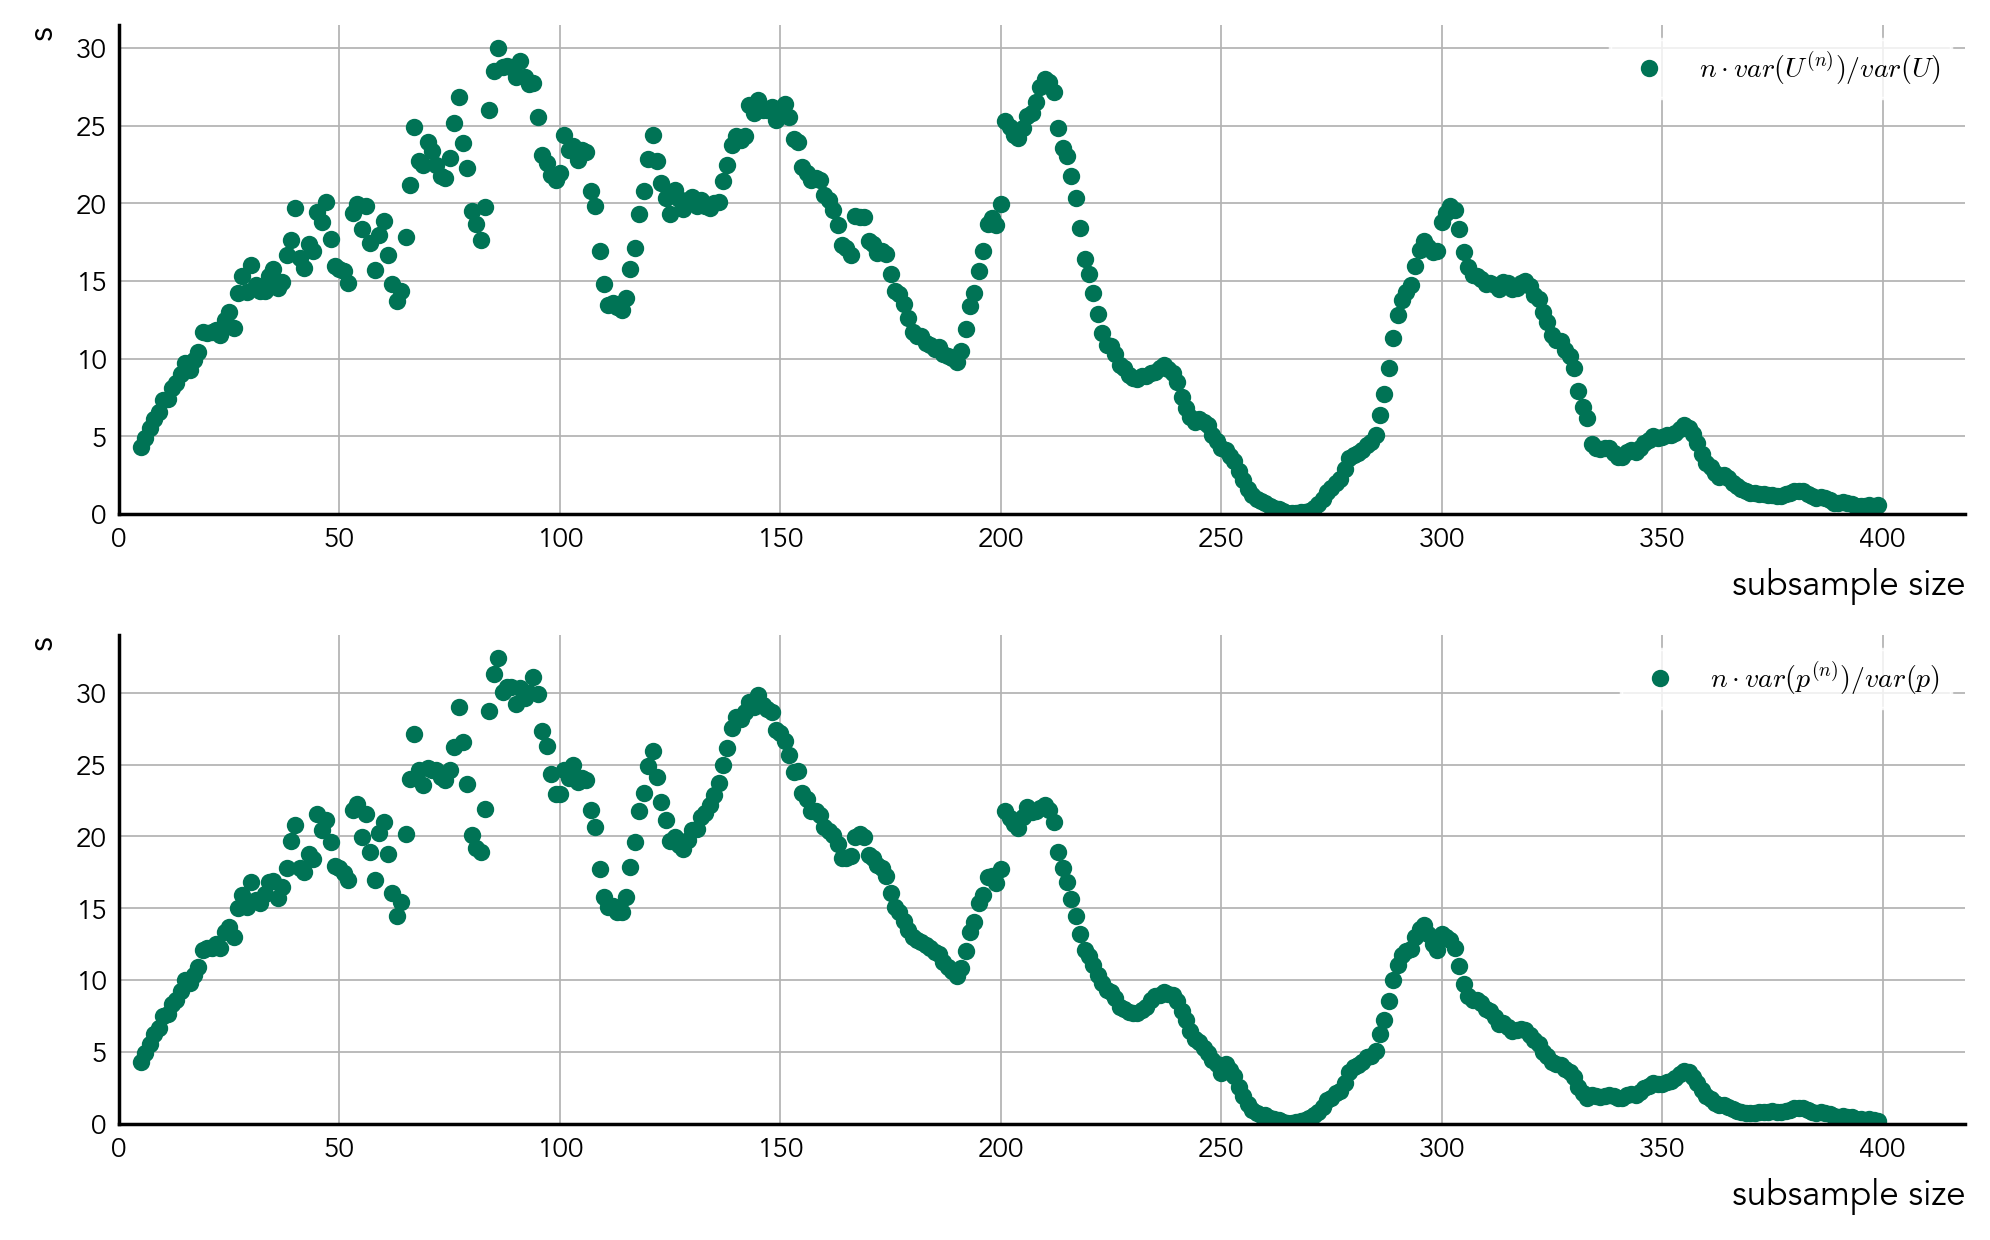

In [11]:
n_min = 5
n_max = 400
step = 1

n = list(np.arange(n_min, n_max, step).astype(int)) # subsample sizes

energy_subsamples = [subsample_data(energy, i) for i in n]
pressure_subsamples = [subsample_data(pressure, i) for i in n]

energy_variances = np.array([np.var(i) for i in energy_subsamples])
pressure_variances = np.array([np.var(i) for i in pressure_subsamples])


s_energy = n*energy_variances/energy.var()
s_pressure = n*pressure_variances/pressure.var()

# plot the s vs n

fig, axs = plt.subplots(2, 1, figsize=(8, 5))

axs[0].plot(n, s_energy, 'o', label='$n \cdot var(U^{(n)})/ var(U)$')
# axs[0].plot(n, n, label='s = 1')
axs[0].set_xlabel('subsample size')
axs[0].set_ylabel('s')
axs[0].set_ylim(bottom=0)
axs[0].set_xlim(left=0)
axs[0].legend()

axs[1].plot(n, s_pressure, 'o', label='$n \cdot var(p^{(n)})/ var(p)$')
# axs[1].plot(n, n, label='s = 1')
axs[1].set_xlabel('subsample size')
axs[1].set_ylabel('s')
axs[1].set_ylim(bottom=0)
axs[1].set_xlim(left=0)
axs[1].legend()

fig.tight_layout()


For further calculations lets choose s = 125.


In [12]:
s = 125 

energy_subsample = subsample_data(energy, s)
pressure_subsample = subsample_data(pressure, s)

energy_mean = np.mean(energy_subsample)
pressure_mean = np.mean(pressure_subsample)

energy_variance = np.var(energy_subsample)
pressure_variance = np.var(pressure_subsample)

print(f'energy U*: {energy_mean} +- {np.sqrt(energy_variance)}')
print(f'pressure p*: {pressure_mean} +- {np.sqrt(pressure_variance)}')


energy U*: -5.5679165799999994 +- 0.02948127051421655
pressure p*: 2.9280593 +- 0.14348167591431454


## Effect of displacement 

originally chosen to 0.4. Lets run the simaltions for values from 0.1 to 0.6.

__output for 0.1__
```bash
 fname=[mclj_out.dat] 

     n=      256
   rho=  0.84186
     t=  1.20000
  disp=  0.10000

    nt=        6000 (*    1)
  accr= 7.15899e-01
 <U>/N=-5.56697e+00
  Cv/N= 2.90678e+00
     p= 2.91892e+00

 Write g(r) to 'amclj.dat? [y] y
 Write PDB format to amclj.pdb? [y] y
```

__output for r = 0.2__


energy U*: -5.5173435600000005 +- 0.11615562042799624
pressure p*: 3.2675371900000005 +- 0.6889600524554783

energy U*: -5.573679 +- 0.0344007331277921
pressure p*: 2.88579925 +- 0.20790188196841702

energy U*: -5.5679165799999994 +- 0.02948127051421655
pressure p*: 2.9280593 +- 0.14348167591431454

energy U*: -5.558228639999999 +- 0.02849613077154221
pressure p*: 2.95132061 +- 0.14376239065420635



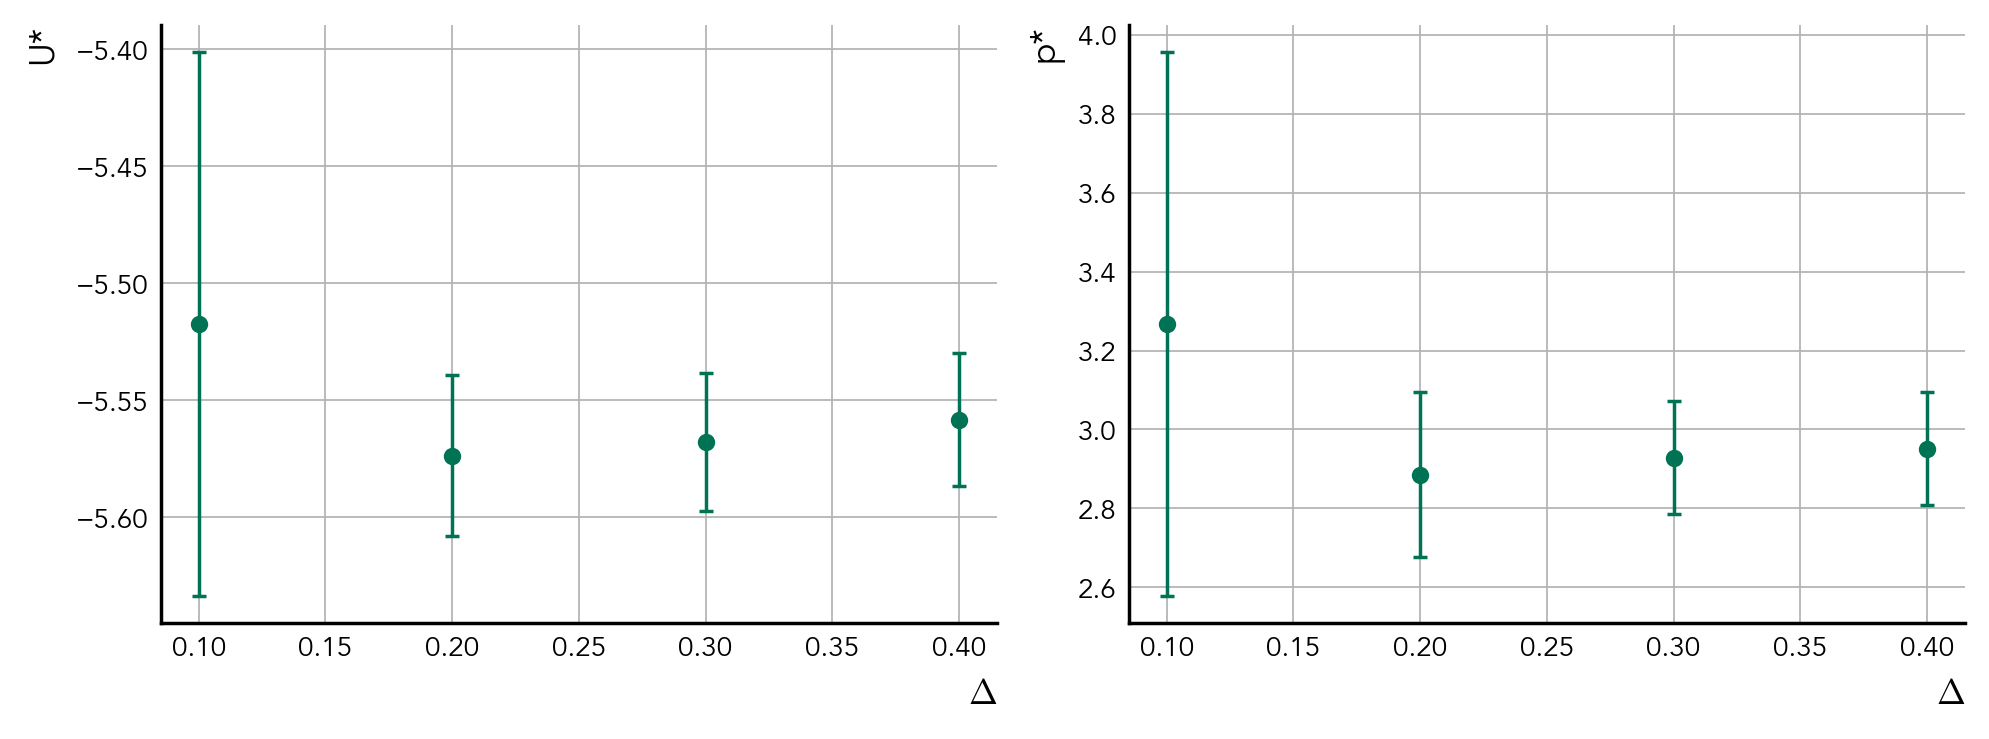

In [13]:
s = 125 
disp = 1

energies_mean = []
energies_variance = []

pressures_mean = []
pressures_variance = []

for disp in range(1, 5):
    df = pd.read_csv(f"results/sim_0{disp}_run_2.dat", header=None, sep="\s+", index_col=0)

    energy = df[2].to_numpy()   
    pressure = df[3].to_numpy() 


    energy_subsample = subsample_data(energy, s)
    pressure_subsample = subsample_data(pressure, s)

    energy_mean = np.mean(energy_subsample)
    pressure_mean = np.mean(pressure_subsample)

    energy_variance = np.var(energy_subsample)
    pressure_variance = np.var(pressure_subsample)

    print(f'energy U*: {energy_mean} +- {np.sqrt(energy_variance)}')
    print(f'pressure p*: {pressure_mean} +- {np.sqrt(pressure_variance)}')
    print()

    energies_mean.append(energy_mean)
    energies_variance.append(energy_variance)

    pressures_mean.append(pressure_mean)
    pressures_variance.append(pressure_variance)


displacement = np.arange(1, 5, 1)/10

fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0].errorbar(displacement, energies_mean, yerr=np.sqrt(energies_variance), fmt='o')
axs[0].set_xlabel('$\Delta$')
axs[0].set_ylabel('U*')


axs[1].errorbar(displacement, pressures_mean, yerr=np.sqrt(pressures_variance), fmt='o')
axs[1].set_xlabel('$\Delta$')
axs[1].set_ylabel('p*')

fig.tight_layout()



# Solution to excercise sheet 1, exercise 4

## (a) background corrections

![solution of the integrals](/Users/jakub.dokulil/Library/Mobile Documents/com~apple~CloudDocs/Documents/computational_physics/ps1/imgs/sol_1_4_a.jpeg)
![solution of the integrals](./imgs/sol_1_4_a.jpeg)

## (b) background corrections application

From the previous calculations we can see $r_c = 3.345 \sigma$.
![solution of the integrals](/Users/jakub.dokulil/Library/Mobile Documents/com~apple~CloudDocs/Documents/computational_physics/ps1/imgs/sol_1_4_b.jpeg)
![solution of the integrals](./imgs/sol_1_4_b.jpeg)
